In [33]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [34]:
image = cv2.imread("../data/images/kingfisher.jpg")

(600, 600, 3)


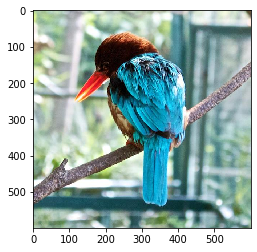

In [35]:
plt.imshow(image[:,:,::-1]);
print(image.shape)

In [36]:
output = 255 * np.ones(image.shape,dtype = np.uint8)

In [37]:
tri_in = np.float32([[[360,50], [60,100], [300,400]]])
tri_out = np.float32([[[400,200], [160,270], [400,400]]])
print(tri_in.shape)

(1, 3, 2)


In [61]:
def warp_triangle(image,output,tri_in,tri_out):
    rect1 = cv2.boundingRect(tri_in)
    rect2 = cv2.boundingRect(tri_out)
    
    tri_in_cropped = []
    tri_out_cropped = []
    for i in range(tri_in.shape[1]):
        tri_in_cropped.append([(tri_in[0][i][0] - rect1[0]),(tri_in[0][i][1] - rect1[1])])
        tri_out_cropped.append([(tri_out[0][i][0] - rect2[0]),(tri_out[0][i][1] - rect2[1])])
        
    warp_mat = cv2.getAffineTransform(np.float32(tri_in_cropped),np.float32(tri_out_cropped))
    print(warp_mat)
    image_1_cropped = image.copy()[rect1[1]:rect1[1]+rect1[3],rect1[0]:rect1[0]+rect1[2]]
    image_2_cropped = cv2.warpAffine(image_1_cropped,warp_mat,(rect2[2],rect2[3]),
                                    None,flags=cv2.INTER_LINEAR,
                              borderMode=cv2.BORDER_REFLECT_101)
    
    mask = np.zeros((rect2[3],rect2[2],3),dtype = np.uint8)
    cv2.fillConvexPoly(mask,np.int32(tri_out_cropped),(255,255,255))
    mask = np.float32(mask)/255.0
    
    image_2_cropped = (image_2_cropped*mask).astype(np.uint8)
    
    inverse_mask = ((1.0 - mask)*255).astype(np.uint8)
    output_cropped = cv2.add(image_2_cropped,inverse_mask)
    
    output[rect2[1]:rect2[1]+rect2[3],rect2[0]:rect2[0]+rect2[2]] = output_cropped
    
    return output

In [62]:
output_image = warp_triangle(image,output,tri_in,tri_out)

[[ 0.82352941  0.14117647 -7.05882353]
 [-0.14215686  0.54705882 42.64705882]]


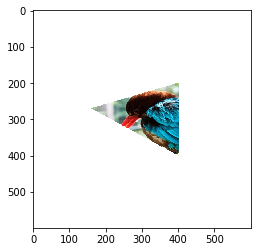

In [63]:
plt.imshow(output_image[:,:,::-1])